In [4]:
import pandas as pd

from ypl.backend.llm.chat import JsonChatIO

io = JsonChatIO("data/45k-synthetic-examples.json")
chats = io.read_chats()

/home/ralph/miniforge3/envs/ys-dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from ypl.backend.llm.constants import MODEL_HEURISTICS
from ypl.pytorch.model.categorizer import CategorizerClassificationModel


categorizer = CategorizerClassificationModel.from_gcp_zip("gs://yupp-models/category-model-base.zip")


/home/ralph/programming/yupp-llms/ypl/pytorch/model/categorizer.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  category_map = torch.load(Path(model_id) / "category_ma

In [ ]:
categorizer = categorizer.cuda()
categorizer.eval()
categorizer.compile_cuda_graphs()

In [ ]:
data = []

from ypl.backend.llm.constants import ModelHeuristics

MODEL_HEURISTICS = \
    {
        "gpt-4o": ModelHeuristics(
            dollars_per_million_input_tokens=5,
            dollars_per_million_output_tokens=15,
            tokenizer_name="gpt-4o",
            tokens_per_second=120,
            skills={
                "all": 9,
                "other": 10,
                "opinion": 8,
                "advice": 6,
                "creative writing": 6,
                "math": 7,
                "code": 7,
                "analysis": 8,
                "entertainment": 8,
                "comparison": 8,
                "reasoning": 7,
                "multilingual": 7,
                "summarization": 10,
                "education": 9,
            },
        ),
        "gpt-4o-mini": ModelHeuristics(
            dollars_per_million_input_tokens=0.15,
            dollars_per_million_output_tokens=0.6,
            tokenizer_name="gpt-4o-mini",
            tokens_per_second=100,
            skills={
                "all": 8,
                "other": 10,
                "opinion": 7,
                "advice": 5,
                "creative writing": 5,
                "math": 7,
                "code": 6,
                "analysis": 7,
                "entertainment": 8,
                "comparison": 7,
                "reasoning": 6,
                "multilingual": 6,
                "summarization": 10,
                "education": 8,
            },
        ),
        "gpt-4o-mini-2024-07-18": ModelHeuristics(
            dollars_per_million_input_tokens=0.15,
            dollars_per_million_output_tokens=0.6,
            tokenizer_name="gpt-4o-mini",
            tokens_per_second=100,
            skills={
                "all": 8,
                "other": 10,
                "opinion": 7,
                "advice": 5,
                "creative writing": 5,
                "math": 7,
                "code": 6,
                "analysis": 7,
                "entertainment": 7,
                "comparison": 7,
                "reasoning": 6,
                "multilingual": 6,
                "summarization": 10,
                "education": 8,
            },
        ),
        "gpt-4-turbo": ModelHeuristics(
            dollars_per_million_input_tokens=10,
            dollars_per_million_output_tokens=30,
            tokenizer_name="gpt-4-turbo",
            tokens_per_second=50,
            skills={
                "all": 8,
                "other": 10,
                "opinion": 7,
                "advice": 6,
                "creative writing": 5,
                "math": 7,
                "code": 6,
                "analysis": 7,
                "entertainment": 7,
                "comparison": 7,
                "reasoning": 6,
                "multilingual": 6,
                "summarization": 10,
                "education": 8,
            },
        ),
        "o1-preview-2024-09-12": ModelHeuristics(
            dollars_per_million_input_tokens=15,
            dollars_per_million_output_tokens=60,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=35,
            skills={
                "all": 10,
                "other": 10,
                "opinion": 10,
                "advice": 10,
                "creative writing": 10,
                "math": 10,
                "code": 10,
                "analysis": 10,
                "entertainment": 10,
                "comparison": 10,
                "reasoning": 10,
                "multilingual": 10,
                "summarization": 10,
                "education": 10,
            },
        ),
        "o1-mini-2024-09-12": ModelHeuristics(
            dollars_per_million_input_tokens=3,
            dollars_per_million_output_tokens=12,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=65,
            skills={
                "all": 10,
                "other": 9,
                "opinion": 9,
                "advice": 6,
                "creative writing": 6,
                "math": 8,
                "code": 8,
                "analysis": 9,
                "entertainment": 9,
                "comparison": 9,
                "reasoning": 9,
                "multilingual": 7,
                "summarization": 10,
                "education": 9,
            },
        ),
        "mistral-large-latest": ModelHeuristics(
            dollars_per_million_input_tokens=3,
            dollars_per_million_output_tokens=9,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=35,
            skills={
                "all": 6,
                "other": 8,
                "opinion": 6,
                "advice": 5,
                "creative writing": 4,
                "math": 4,
                "code": 4,
                "analysis": 6,
                "entertainment": 6,
                "comparison": 6,
                "reasoning": 6,
                "multilingual": 4,
                "summarization": 7,
                "education": 5,
            },
        ),
        "gemini-1.5-pro": ModelHeuristics(
            dollars_per_million_input_tokens=3.5,
            dollars_per_million_output_tokens=10.5,
            tokenizer_type="google",
            tokenizer_name="gemini-1.5-pro",
            tokens_per_second=65,
            skills={
                "all": 8,
                "other": 8,
                "opinion": 8,
                "advice": 5,
                "creative writing": 7,
                "math": 6,
                "code": 5,
                "analysis": 7,
                "entertainment": 7,
                "comparison": 7,
                "reasoning": 6,
                "multilingual": 8,
                "summarization": 9,
                "education": 7,
            },
        ),
        "gemma-2-9b-it": ModelHeuristics(
            dollars_per_million_input_tokens=0.2,  # based on fireworks
            dollars_per_million_output_tokens=0.2,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=100,
            skills={
                "all": 4,
                "other": 5,
                "opinion": 3,
                "advice": 4,
                "creative writing": 3,
                "math": 2,
                "code": 2,
                "analysis": 3,
                "entertainment": 3,
                "comparison": 3,
                "reasoning": 4,
                "multilingual": 1,
                "summarization": 6,
                "education": 2,
            },
        ),
        "gemini-1.5-flash-8b": ModelHeuristics(
            dollars_per_million_input_tokens=0.2,  # based on fireworks
            dollars_per_million_output_tokens=0.2,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=120,
            skills={
                "all": 4,
                "other": 5,
                "opinion": 3,
                "advice": 4,
                "creative writing": 3,
                "math": 2,
                "code": 2,
                "analysis": 3,
                "entertainment": 3,
                "comparison": 3,
                "reasoning": 4,
                "multilingual": 6,
                "summarization": 6,
                "education": 2,
            },
        ),
        "claude-3-5-sonnet-20240620": ModelHeuristics(
            dollars_per_million_input_tokens=3,
            dollars_per_million_output_tokens=15,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=80,
            skills={
                "all": 7,
                "other": 7,
                "opinion": 7,
                "advice": 10,
                "creative writing": 9,
                "math": 6,
                "code": 8,
                "analysis": 7,
                "entertainment": 8,
                "comparison": 6,
                "reasoning": 6,
                "multilingual": 5,
                "summarization": 9,
                "education": 8,
            },
        ),
        "meta-llama/Meta-Llama-3.1-70B-Instruct": ModelHeuristics(
            dollars_per_million_input_tokens=0.9,  # based on fireworks
            dollars_per_million_output_tokens=0.9,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=90,
            skills={
                "all": 5,
                "other": 5,
                "opinion": 5,
                "advice": 4,
                "creative writing": 6,
                "math": 4,
                "code": 4,
                "analysis": 6,
                "entertainment": 5,
                "comparison": 5,
                "reasoning": 5,
                "multilingual": 4,
                "summarization": 8,
                "education": 4,
            },
        ),
        "phi-3-mini-4k-instruct": ModelHeuristics(
            dollars_per_million_input_tokens=0.2,  # based on fireworks
            dollars_per_million_output_tokens=0.2,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=130,
            skills={
                "all": 2,
                "other": 2,
                "opinion": 2,
                "advice": 2,
                "creative writing": 2,
                "math": 5,
                "code": 6,
                "analysis": 3,
                "entertainment": 2,
                "comparison": 2,
                "reasoning": 2,
                "multilingual": 0,
                "summarization": 2,
                "education": 2,
            },
        ),
        "phi-3-medium-4k-instruct": ModelHeuristics(
            dollars_per_million_input_tokens=0.2,  # based on fireworks
            dollars_per_million_output_tokens=0.2,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=120,
            skills={
                "all": 2,
                "other": 2,
                "opinion": 2,
                "advice": 2,
                "creative writing": 2,
                "math": 6,
                "code": 6,
                "analysis": 4,
                "entertainment": 2,
                "comparison": 2,
                "reasoning": 2,
                "multilingual": 0,
                "summarization": 2,
                "education": 2,
            },
        ),
        "yi-large": ModelHeuristics(
            dollars_per_million_input_tokens=3,  # based on fireworks
            dollars_per_million_output_tokens=3,
            tokenizer_name="gpt-4o",  # approximation
        ),
        "deepseek-coder-v2": ModelHeuristics(
            dollars_per_million_input_tokens=0.9,  # based on fireworks
            dollars_per_million_output_tokens=0.9,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=50,
            skills={
                "all": 5,
                "other": 6,
                "opinion": 5,
                "advice": 5,
                "creative writing": 3,
                "math": 8,
                "code": 8,
                "analysis": 5,
                "entertainment": 4,
                "comparison": 3,
                "reasoning": 5,
                "multilingual": 7,
                "summarization": 8,
                "education": 7,
            },
        ),
        "nemotron-4-340b-instruct": ModelHeuristics(
            dollars_per_million_input_tokens=10,  # rough approximation
            dollars_per_million_output_tokens=10,
            tokenizer_name="gpt-4o",  # approximation
        ),
        "qwen1.5-7b-chat": ModelHeuristics(
            dollars_per_million_input_tokens=3,  # based on Alibaba
            dollars_per_million_output_tokens=3,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=100,
            skills={
                "all": 2,
                "other": 2,
                "opinion": 2,
                "advice": 2,
                "creative writing": 2,
                "math": 3,
                "code": 3,
                "analysis": 3,
                "entertainment": 2,
                "comparison": 2,
                "reasoning": 2,
                "multilingual": 4,
                "summarization": 2,
                "education": 2,
            },
        ),
        "qwen1.5-72b-chat": ModelHeuristics(
            dollars_per_million_input_tokens=3,  # based on Alibaba
            dollars_per_million_output_tokens=9,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=80,
            skills={
                "all": 3,
                "other": 4,
                "opinion": 4,
                "advice": 3,
                "creative writing": 3,
                "math": 5,
                "code": 5,
                "analysis": 4,
                "entertainment": 3,
                "comparison": 4,
                "reasoning": 4,
                "multilingual": 5,
                "summarization": 5,
                "education": 3,
            },
        ),
        "qwen-max": ModelHeuristics(
            dollars_per_million_input_tokens=10,  # based on Alibaba
            dollars_per_million_output_tokens=10,
            tokenizer_name="gpt-4o",  # approximation
            tokens_per_second=35,
            skills={
                "all": 5,
                "other": 5,
                "opinion": 6,
                "advice": 5,
                "creative writing": 5,
                "math": 5,
                "code": 6,
                "analysis": 6,
                "entertainment": 4,
                "comparison": 5,
                "reasoning": 5,
                "multilingual": 5,
                "summarization": 7,
                "education": 4,
            },
        ),
    }

import random

random.shuffle(chats)

for chat in chats:
    try:
        input_string = chat.messages[0][0].content
        output_string1 = chat.messages[1][0].content
        output_string2 = chat.messages[1][1].content
        model1 = chat.eval_llms[0]
        model2 = chat.eval_llms[1]

        cost1 = MODEL_HEURISTICS[model1].compute_cost(
            output_string=output_string1,
            input_string=input_string,
        )
        cost2 = MODEL_HEURISTICS[model2].compute_cost(
            output_string=output_string2,
            input_string=input_string,
        )
    except Exception as e:
        continue

    res = categorizer.categorize(input_string)
    data.append(dict(
        category=res[0],
        difficulty=res[1],
        model=model1,
        cost=cost1,
        prompt=input_string,
        output=output_string1,
    ))

    data.append(dict(
        category=res[0],
        difficulty=res[1],
        model=model2,
        cost=cost2,
        prompt=input_string,
        output=output_string2,
    ))


In [34]:
df = pd.DataFrame(data)

## Mean cost of each example sent to all 14 models

In [35]:
df = df.sample(frac=1, replace=False)

In [36]:
df.to_csv("cost_data.csv", index=False)

In [62]:
df.groupby("model").mean("cost")

,difficulty,cost
model,,
claude-3-5-sonnet-20240620,4.756392,0.004684
deepseek-coder-v2,4.302974,0.000279
gemini-1.5-pro,4.706897,0.004336
gemma-2-9b-it,4.811693,0.000074
gpt-4-turbo,4.749723,0.012454
gpt-4o,4.839849,0.005979
gpt-4o-mini,4.795775,0.000235
meta-llama/Meta-Llama-3.1-70B-Instruct,4.791323,0.000455
mistral-large-latest,4.756794,0.003202


In [52]:
df2 = df[df.model != "gemini-1.5-pro"]

In [53]:
category_min_counts = df2.groupby(["model", "category"]).count().reset_index().groupby("category").min("cost")

In [54]:
cat_dfs = []

for category in df2.category.unique():
    min_count = category_min_counts.loc[category]
    data_rows = []
    
    for model in df2.model.unique():
        d = []
        df4 = df2[(df2.category == category) & (df2.model == model)]

        for idx in range(min_count.iloc[0]):
            d.append(dict(cost=df4.iloc[idx]["cost"], model=model, idx=idx, category=category))

        data_rows.append(d)

    cat_df = pd.concat([pd.DataFrame(tup) for tup in zip(*data_rows)])
    cat_dfs.append(cat_df)


In [55]:
from matplotlib import pyplot as plt
import numpy as np

def plot_cdf(arr: np.ndarray, ax, label: str):
    # Sort the array then plot the ECDF as a plt.step
    x = np.sort(arr)
    y = np.arange(len(x)) / len(x)
    ax.step(x, y, where="post", label=label)

<Figure size 640x480 with 0 Axes>

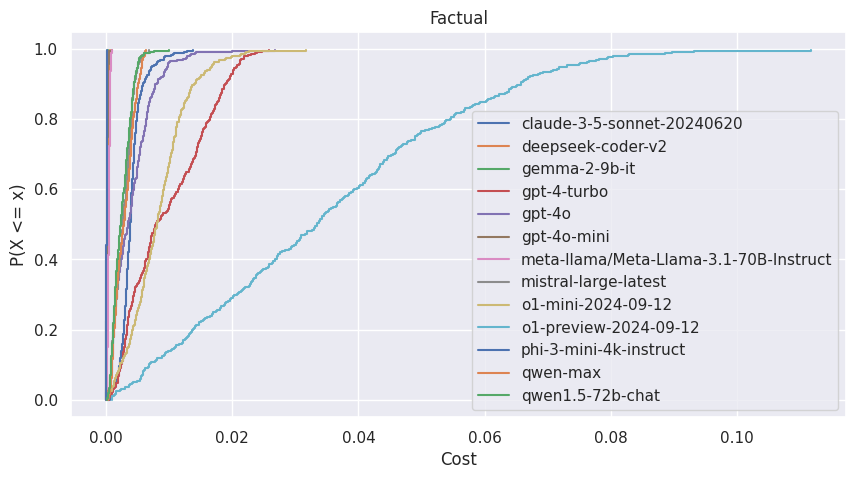

<Figure size 640x480 with 0 Axes>

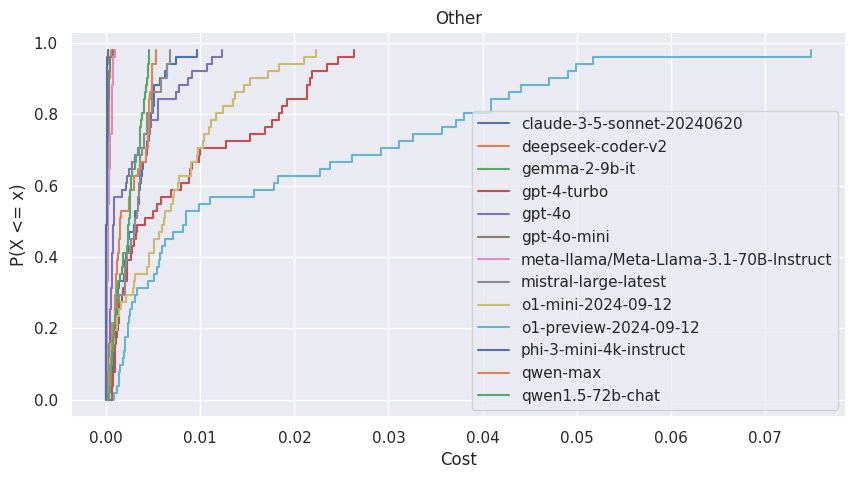

<Figure size 640x480 with 0 Axes>

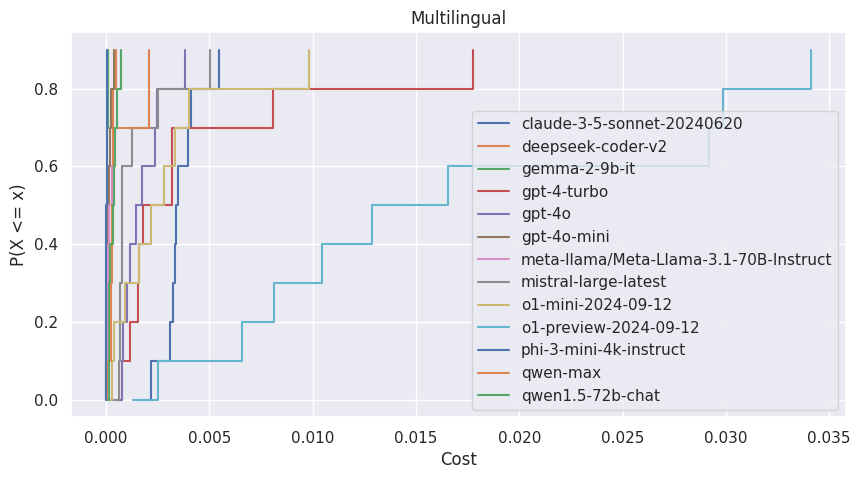

<Figure size 640x480 with 0 Axes>

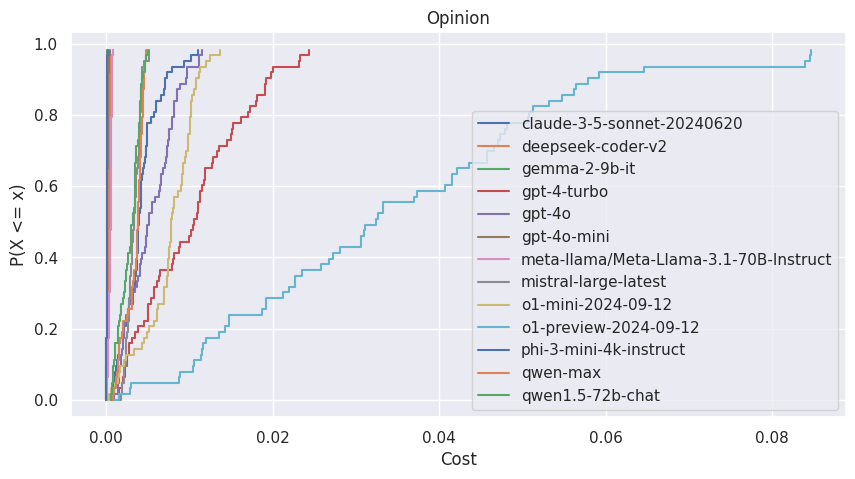

<Figure size 640x480 with 0 Axes>

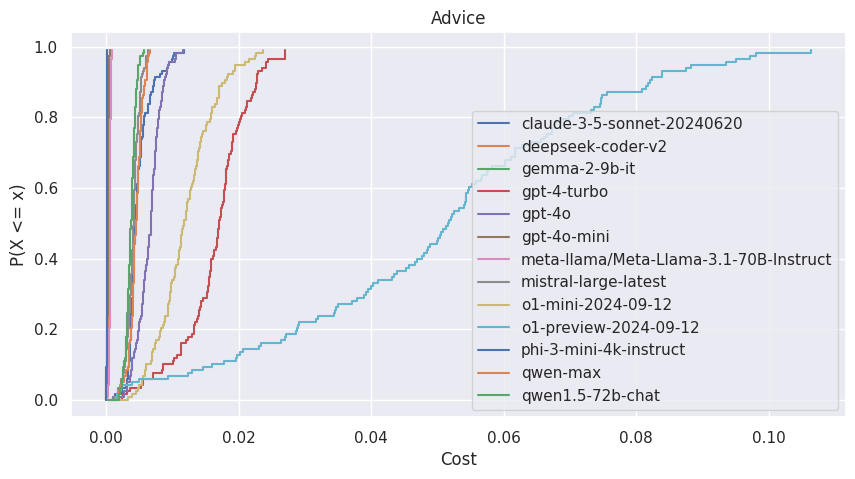

<Figure size 640x480 with 0 Axes>

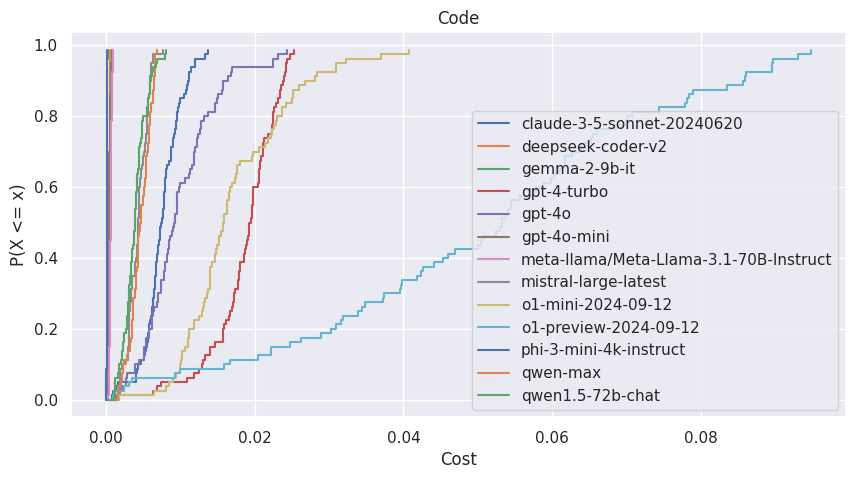

<Figure size 640x480 with 0 Axes>

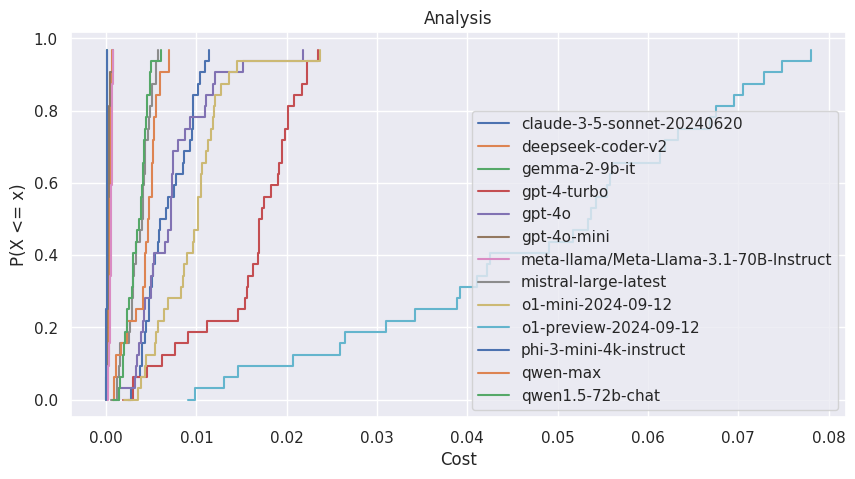

<Figure size 640x480 with 0 Axes>

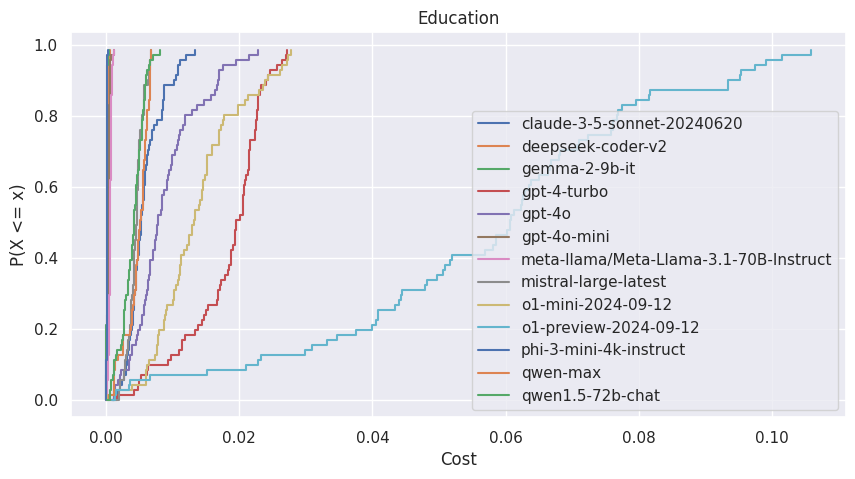

<Figure size 640x480 with 0 Axes>

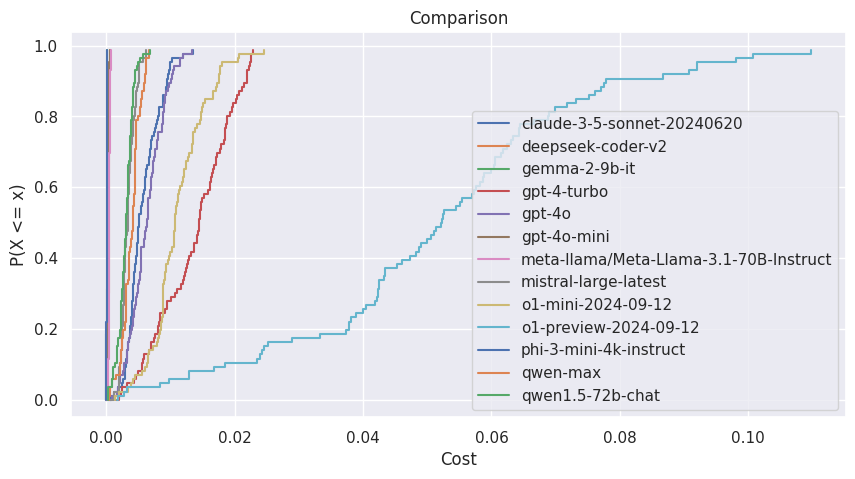

<Figure size 640x480 with 0 Axes>

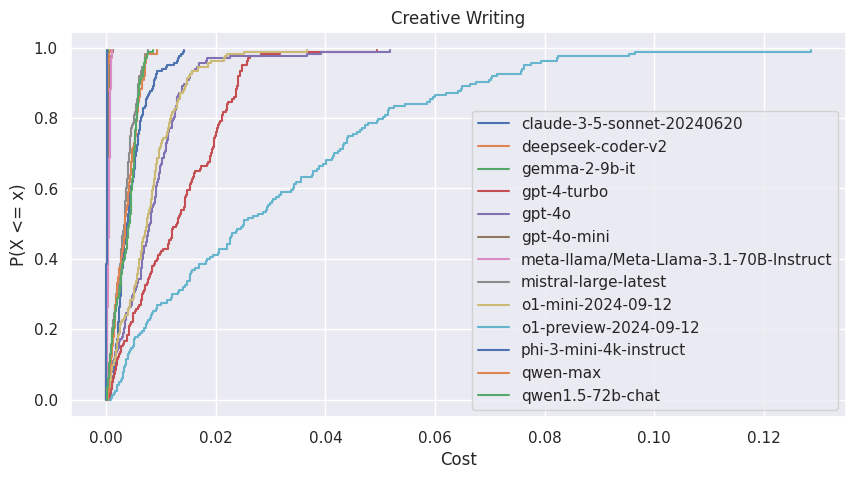

<Figure size 640x480 with 0 Axes>

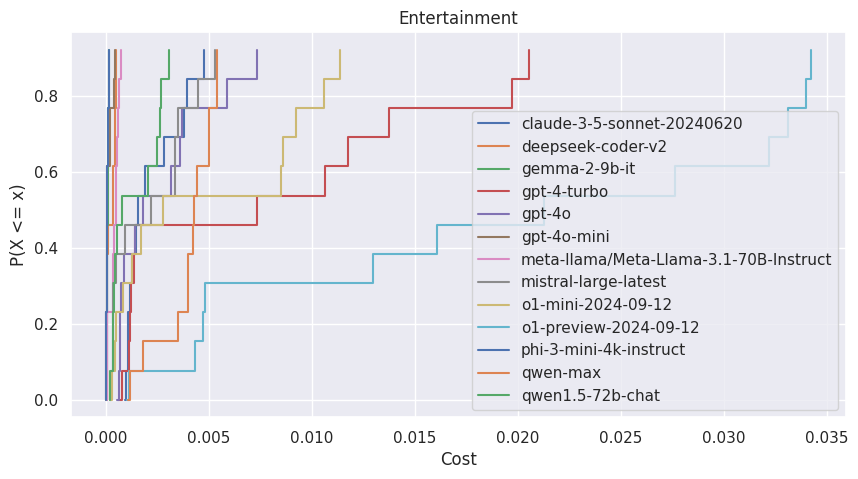

<Figure size 640x480 with 0 Axes>

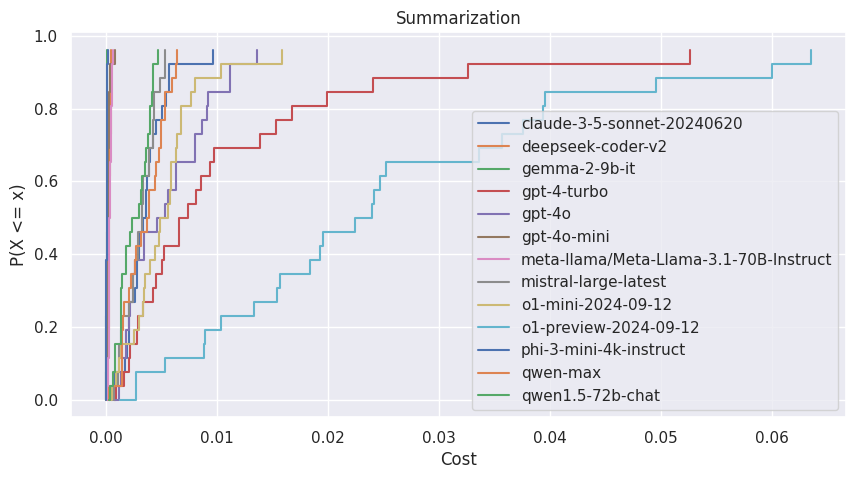

<Figure size 640x480 with 0 Axes>

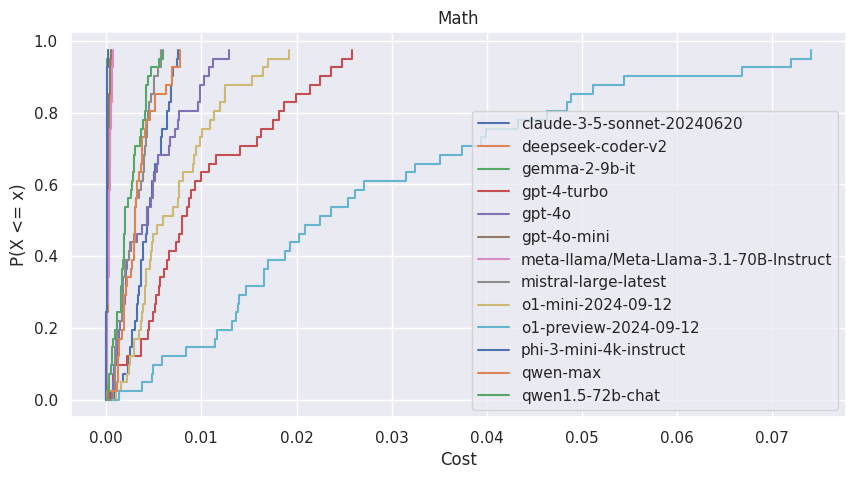

<Figure size 640x480 with 0 Axes>

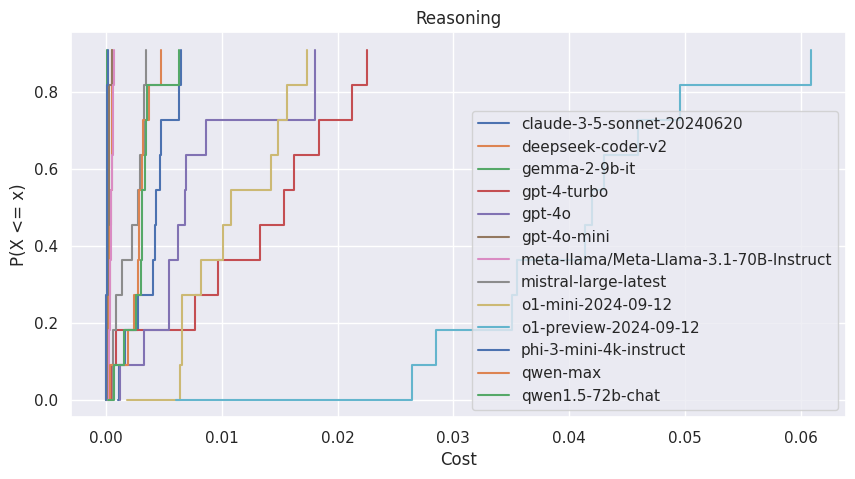

In [56]:
import seaborn as sns
sns.set_theme()
cost_dfs = []

for cat_df in cat_dfs:
    orig_cat_df = cat_df
    cat_df = cat_df.pivot(columns="model", values="cost", index="idx").reset_index(drop=True)
    plt.clf()

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax.set_title(orig_cat_df.category.unique()[0])
    ax.set_xlabel("Cost")
    ax.set_ylabel("P(X <= x)")
    cost_dfs.append(cat_df)

    for model in cat_df.columns:
        plot_cdf(cat_df[model].values, ax, model)

    ax.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

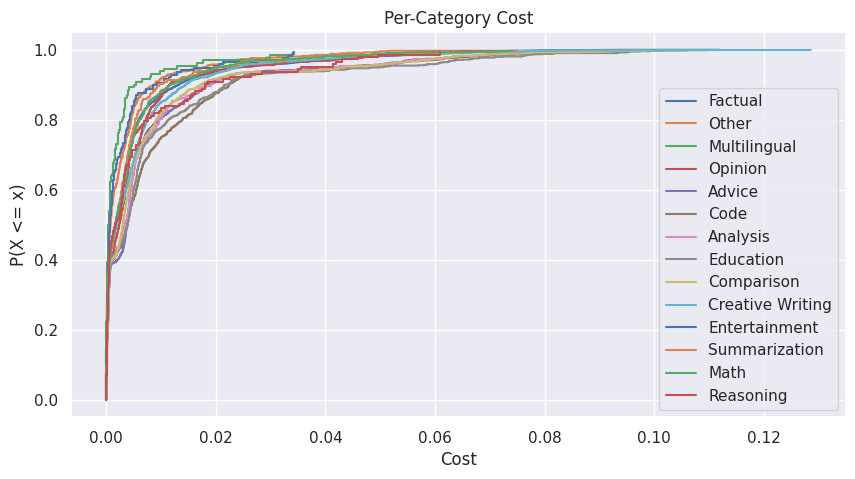

In [61]:
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title("Per-Category Cost")
ax.set_xlabel("Cost")
ax.set_ylabel("P(X <= x)")
cost_df = pd.concat(cost_dfs)
all_cat_df = pd.concat(cat_dfs)

for category in all_cat_df.category.unique():
    plot_cdf(all_cat_df[all_cat_df.category == category].cost.values.flatten(), ax, category)

ax.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

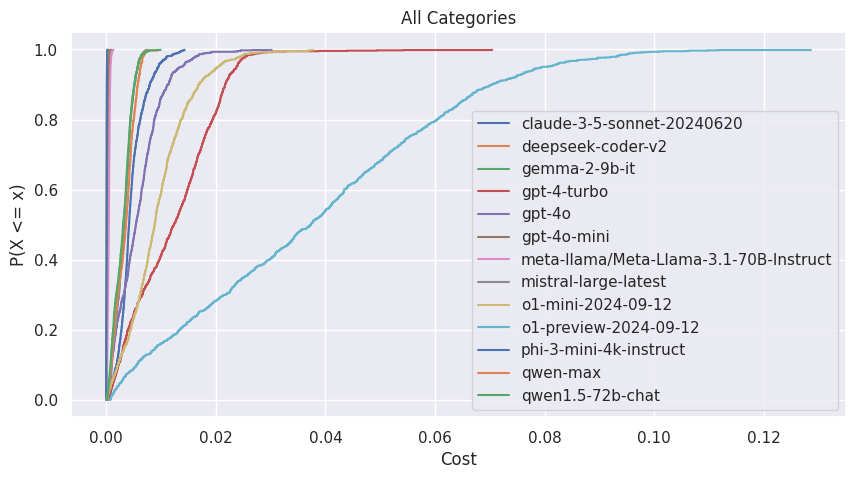

In [16]:
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title("All Categories")
ax.set_xlabel("Cost")
ax.set_ylabel("P(X <= x)")
cost_df = pd.concat(cost_dfs)

for model in cost_df.columns:
    plot_cdf(cost_df[model].values, ax, model)

ax.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

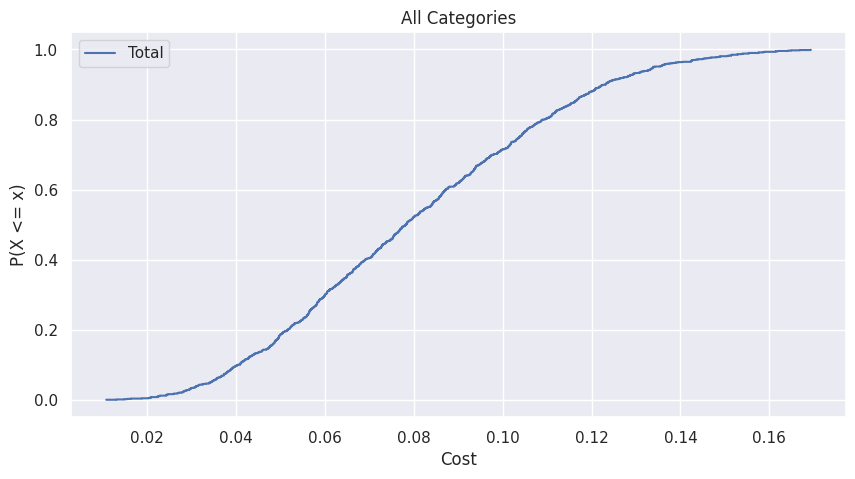

In [20]:
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title("All Categories")
ax.set_xlabel("Cost")
ax.set_ylabel("P(X <= x)")
cost_df = pd.concat(cost_dfs)

plot_cdf(np.sum(cost_df.values, axis=1), ax, label="Total")

ax.legend()
plt.show()

In [75]:
from collections import defaultdict
from tqdm import tqdm

category_costs = defaultdict(list)
all_category_speeds = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    model = row["model"]
    min_cost = 10000000000000
    min_speed = 0

    for m, h in MODEL_HEURISTICS.items():
        q = h.estimate_quality(row["category"], row["difficulty"])

        if q >= 0:
            cost = MODEL_HEURISTICS[m].compute_cost(input_string=row["prompt"], output_string=row["output"])
            if cost < min_cost:
                min_cost = cost
                min_speed = h.tokens_per_second
    
    category_costs[row["category"]].append(min_cost)
    all_category_speeds.append(min_speed)

100%|██████████| 59830/59830 [03:34<00:00, 278.92it/s]


In [66]:
from collections import defaultdict
from tqdm import tqdm

random_router_costs = []
random_router_speed = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    random_router_costs.append(MODEL_HEURISTICS[row["model"]].compute_cost(input_string=row["prompt"], output_string=row["output"]))
    random_router_speed.append(MODEL_HEURISTICS[row["model"]].tokens_per_second)

100%|██████████| 59830/59830 [00:18<00:00, 3151.97it/s]


<Figure size 640x480 with 0 Axes>

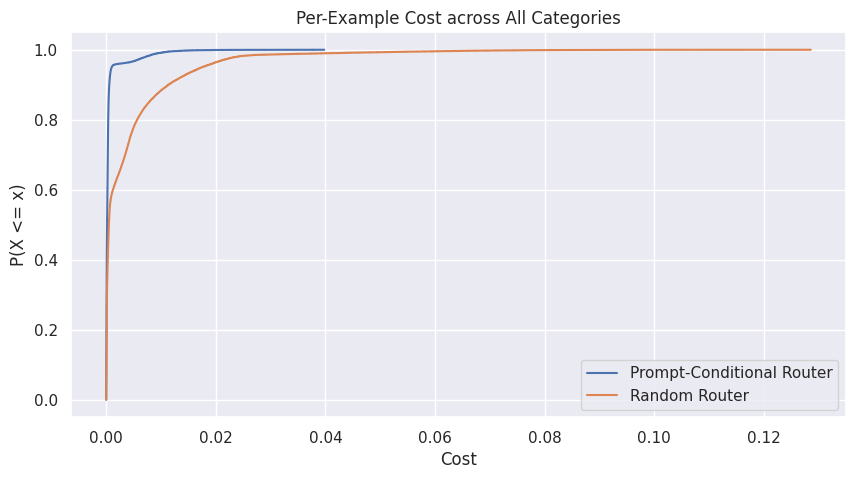

In [51]:
all_costs = []

for category, costs in category_costs.items():
    all_costs += costs

plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title("Per-Example Cost across All Categories")
ax.set_xlabel("Cost")
ax.set_ylabel("P(X <= x)")

plot_cdf(all_costs, ax, label="Prompt-Conditional Router")
plot_cdf(random_router_costs, ax, label="Random Router")
ax.legend()
plt.show()


In [63]:
np.quantile(random_router_costs, 0.9), np.quantile(all_costs, 0.9)

(0.011349999999999999, 0.0005550149999999997)

In [65]:
np.sum(all_costs) / np.sum(random_router_costs)

0.13554337401364955

In [77]:
np.sum(all_category_speeds) / np.sum(random_router_speed)


1.1019612276560857